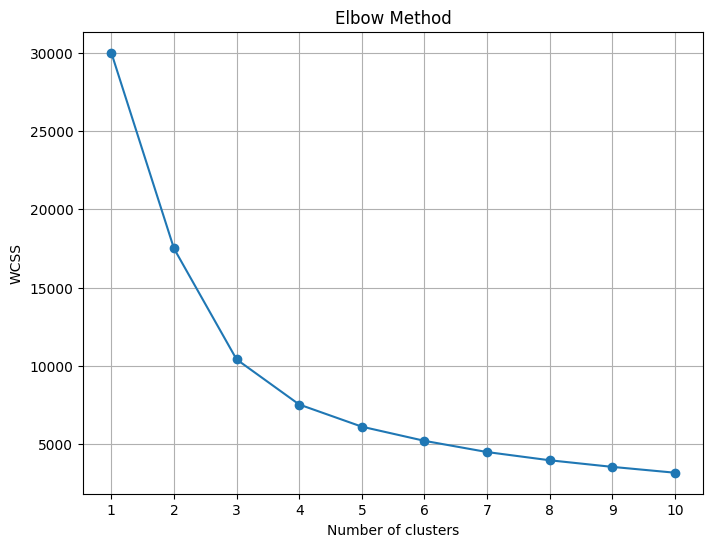

(10000, 2)

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#Load dataset
dataset = pd.read_csv("/content/Bank_data.csv")
dataset=dataset.iloc[:,3:]
dataset= pd.get_dummies(dataset, columns=['Geography','Gender'], drop_first=True)

#Apply standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
dataset=sc.fit_transform(dataset)

#Apply pca
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_pca=pca.fit_transform(dataset)


# Calculate WCSS for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x_pca)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()
x_pca.shape


In [70]:
#Train and predict
kmeans=KMeans(n_clusters=4,init='k-means++',max_iter=200,n_init=10,random_state=10)
y_kmeans=kmeans.fit_predict(x_pca)


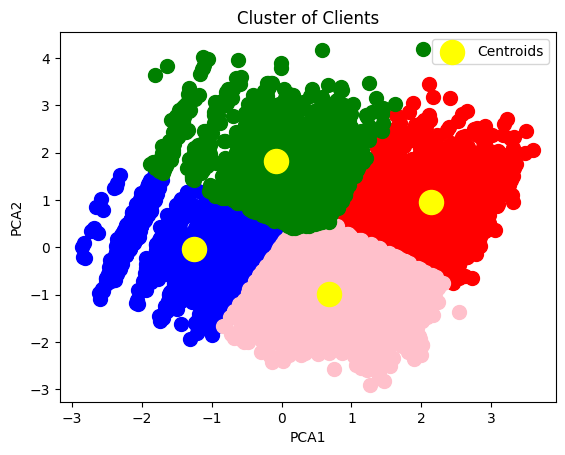

In [71]:

#Plot
import matplotlib.pyplot as plt
plt.scatter(x_pca[y_kmeans==0,0],x_pca[y_kmeans==0,1],s=100,c='red',)
plt.scatter(x_pca[y_kmeans==1,0],x_pca[y_kmeans==1,1],s=100,c='blue')
plt.scatter(x_pca[y_kmeans==2,0],x_pca[y_kmeans==2,1],s=100,c='pink')
plt.scatter(x_pca[y_kmeans==3,0],x_pca[y_kmeans==3,1],s=100,c='green')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='Yellow',label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

**Silhouette method**

In [74]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters_range = range(2, 11)
silhouette_scores = []

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(x_pca)
    silhouette_avg = silhouette_score(x_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

optimal_n_clusters = n_clusters_range[silhouette_scores.index(max(silhouette_scores))]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [77]:
optimal_n_clusters

4

In [75]:
#Train and predict
kmeans=KMeans(n_clusters=optimal_n_clusters,init='k-means++',max_iter=200,n_init=10,random_state=10)
y_kmeans=kmeans.fit_predict(x_pca)


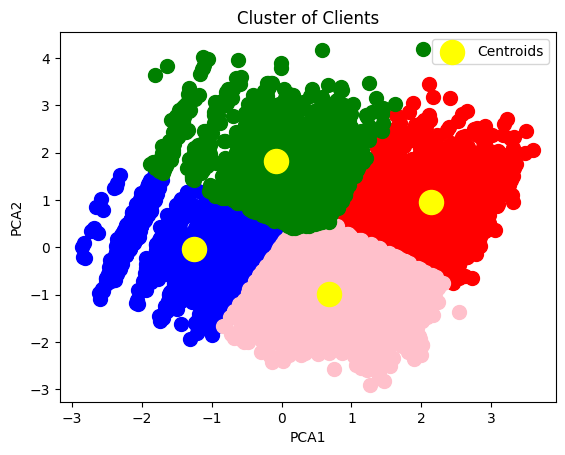

In [76]:
#Plot
import matplotlib.pyplot as plt
plt.scatter(x_pca[y_kmeans==0,0],x_pca[y_kmeans==0,1],s=100,c='red',)
plt.scatter(x_pca[y_kmeans==1,0],x_pca[y_kmeans==1,1],s=100,c='blue')
plt.scatter(x_pca[y_kmeans==2,0],x_pca[y_kmeans==2,1],s=100,c='pink')
plt.scatter(x_pca[y_kmeans==3,0],x_pca[y_kmeans==3,1],s=100,c='green')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='Yellow',label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

**Gap statistic**

In [80]:
from sklearn.cluster import KMeans
from gap_statistic import OptimalK
import numpy as np
optimalK = OptimalK(parallel_backend='joblib')
n_clusters = optimalK(x_pca, cluster_array=np.arange(1, 11))
print("Optimal clusters:", n_clusters)

Optimal clusters: 3


In [81]:
kmeans=KMeans(n_clusters=n_clusters,init='k-means++',max_iter=200,n_init=10,random_state=10)
y_kmeans=kmeans.fit_predict(x_pca)


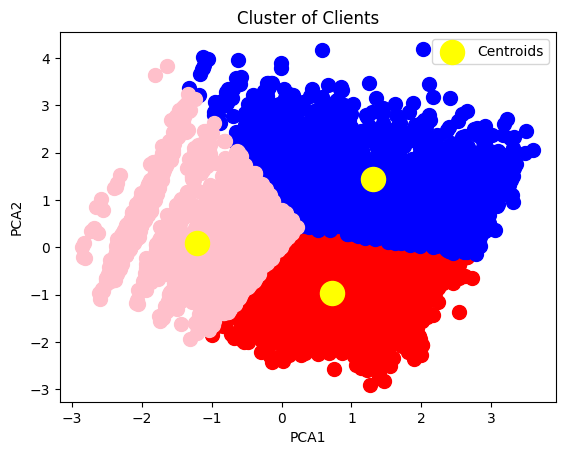

In [83]:
import matplotlib.pyplot as plt
plt.scatter(x_pca[y_kmeans==0,0],x_pca[y_kmeans==0,1],s=100,c='red',)
plt.scatter(x_pca[y_kmeans==1,0],x_pca[y_kmeans==1,1],s=100,c='blue')
plt.scatter(x_pca[y_kmeans==2,0],x_pca[y_kmeans==2,1],s=100,c='pink')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='Yellow',label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

create array that resmble 2 varible in a dataset note that while we only use two variables here this method will work with any number of variables

In [59]:
x=[4,5,10,4,3,11,14,6,10,12]
y=[21,19,24,17,16,25,24,22,21,21]

In [60]:
data=list(zip(x,y))
print(data)
X = np.array(data)

[(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (6, 22), (10, 21), (12, 21)]


In [61]:
wcss=[]

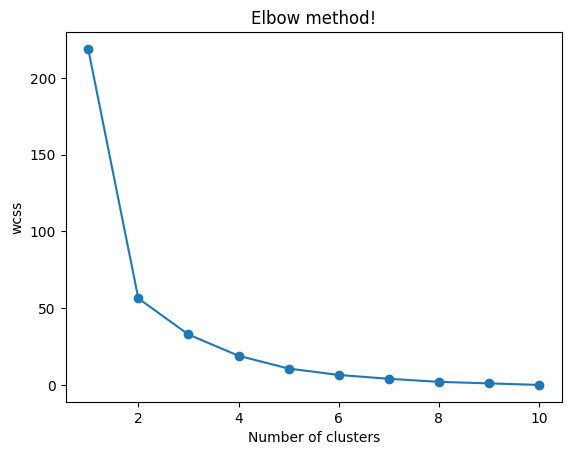

In [62]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init ='k-means++', max_iter = 300, n_init = 10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss,marker='o')
plt.title('Elbow method!')
plt.xlabel('Number of clusters')
plt.ylabel("wcss")
plt.show()

In [63]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
Y_kmeans=kmeans.fit_predict(X)

In [64]:
print(Y_kmeans)

[0 0 1 2 2 1 1 0 1 1]


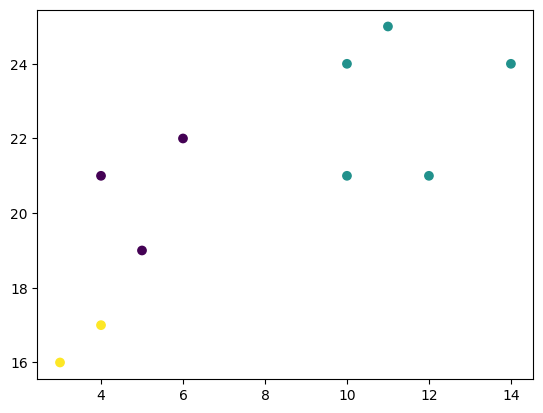

In [65]:
x,y=zip(*X)

kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
Y_kmeans=kmeans.fit_predict(X)
plt.scatter(x,y,c=Y_kmeans)
plt.show()

kmeans-mall dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv("/content/mall.csv")

In [3]:
X=dataset.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

**  WCSS method to find optimal clusters**

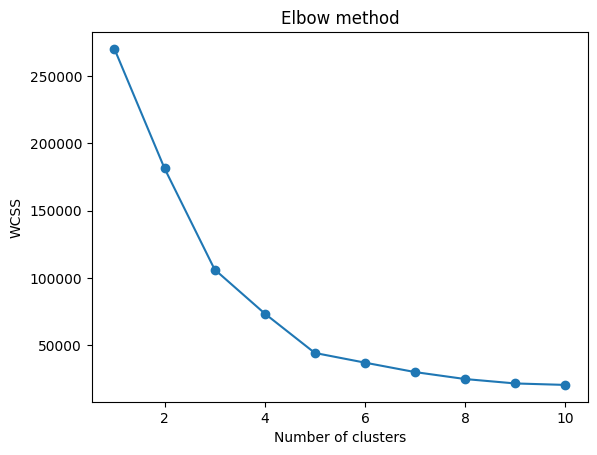

In [6]:
WCSS = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

plt.plot(range(1,11), WCSS,marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)
print(y_kmeans)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


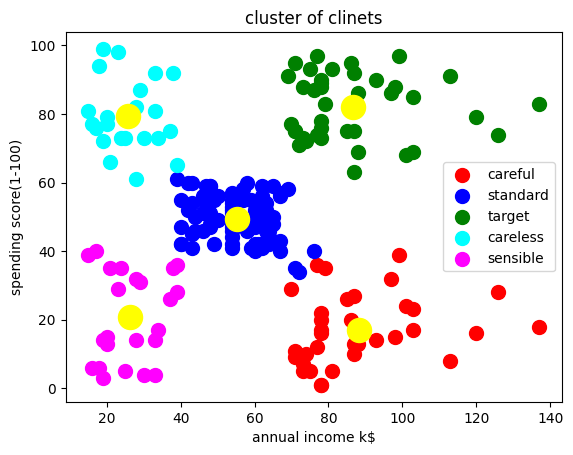

In [8]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c="red",label="careful")
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c="blue",label="standard")
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c="green",label="target")
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c="cyan",label="careless")
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c="magenta",label="sensible")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c="yellow",label="")
plt.title("cluster of clinets")
plt.xlabel("annual income k$")
plt.ylabel("spending score(1-100)")
plt.legend()
plt.show()

kmeans-malldataset(SilhouetteScore)

In [20]:
dataset=pd.read_csv("/content/mall.csv")

In [17]:
X=dataset.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(X)

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters_range = range(2, 11)
silhouette_scores = []

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(x)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

optimal_n_clusters = n_clusters_range[silhouette_scores.index(max(silhouette_scores))]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [24]:
optimal_n_clusters

5

In [25]:
kmeans=KMeans(n_clusters=optimal_n_clusters,init='k-means++',max_iter=300,n_init=10,random_state=0)
Y_kmeans=kmeans.fit_predict(X)
print(Y_kmeans)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


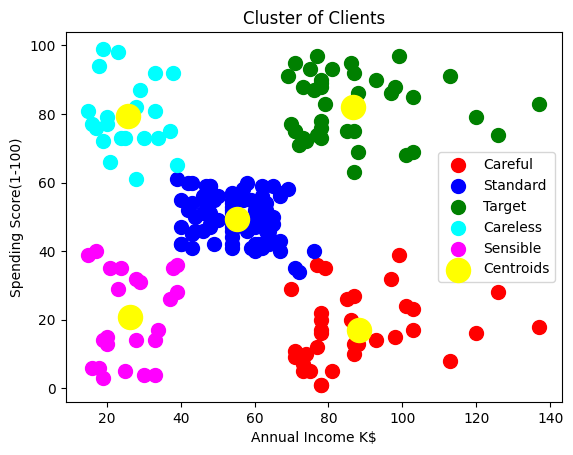

In [26]:
import matplotlib.pyplot as plt
plt.scatter(X[Y_kmeans==0,0],X[Y_kmeans==0,1],s=100,c='red',label='Careful')
plt.scatter(X[Y_kmeans==1,0],X[Y_kmeans==1,1],s=100,c='blue',label='Standard')
plt.scatter(X[Y_kmeans==2,0],X[Y_kmeans==2,1],s=100,c='green',label='Target')
plt.scatter(X[Y_kmeans==3,0],X[Y_kmeans==3,1],s=100,c='cyan',label='Careless')
plt.scatter(X[Y_kmeans==4,0],X[Y_kmeans==4,1],s=100,c='magenta',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='Yellow',label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('Annual Income K$')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

Gap-stat


In [27]:
pip install gap-stat

In [29]:
from sklearn.cluster import KMeans
from gap_statistic import OptimalK
import numpy as np
optimalK = OptimalK(parallel_backend='joblib')
n_clusters = optimalK(x, cluster_array=np.arange(1, 11))
print("Optimal clusters:", n_clusters)

Optimal clusters: 6


In [33]:
kmeans=KMeans(n_clusters=n_clusters,init='k-means++',max_iter=300,n_init=10,random_state=0)
Y_kmeans=kmeans.fit_predict(X)
print(Y_kmeans)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 5 0 5 1 5 0 5 0 5 1 5 0 5 0 5 0 5 0 5 1 5 0 5 0 5
 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


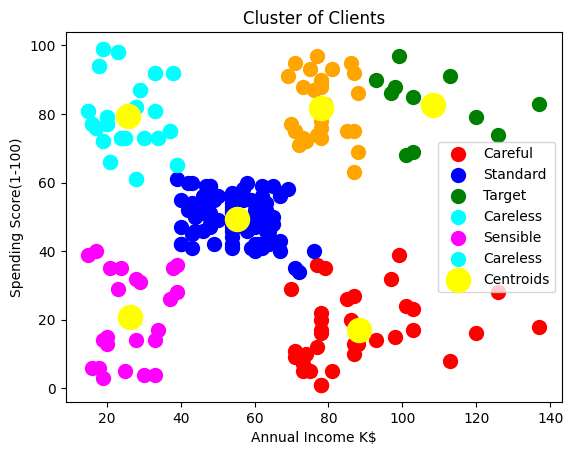

In [36]:
import matplotlib.pyplot as plt
plt.scatter(X[Y_kmeans==0,0],X[Y_kmeans==0,1],s=100,c='red',label='Careful')
plt.scatter(X[Y_kmeans==1,0],X[Y_kmeans==1,1],s=100,c='blue',label='Standard')
plt.scatter(X[Y_kmeans==2,0],X[Y_kmeans==2,1],s=100,c='green',label='Target')
plt.scatter(X[Y_kmeans==3,0],X[Y_kmeans==3,1],s=100,c='cyan',label='Careless')
plt.scatter(X[Y_kmeans==4,0],X[Y_kmeans==4,1],s=100,c='magenta',label='Sensible')
plt.scatter(X[Y_kmeans==3,0],X[Y_kmeans==3,1],s=100,c='cyan',label='Careless')
plt.scatter(X[Y_kmeans==5,0],X[Y_kmeans==5,1],s=100,c='orange')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='Yellow',label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('Annual Income K$')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

Iris dataset

In [38]:
from sklearn import datasets

In [39]:
iris = datasets.load_iris()
iris
X = iris.data[:,:2]
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

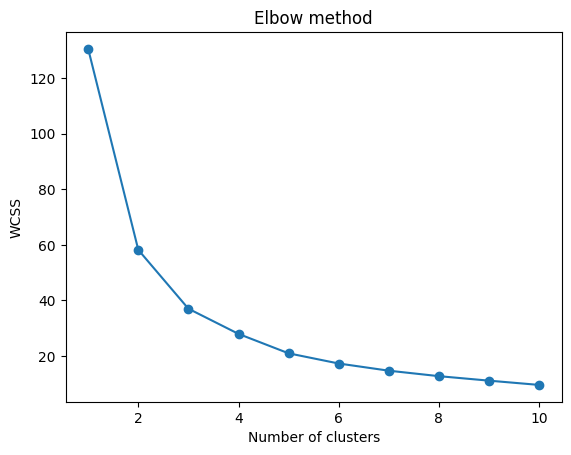

In [40]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

WCSS = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

plt.plot(range(1,11), WCSS,marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [43]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
Y_kmeans=kmeans.fit_predict(X)
print(Y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 2 2 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


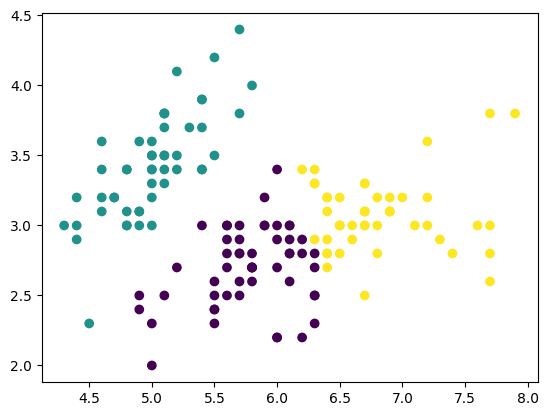

In [42]:
x,y=zip(*X)

kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
Y_kmeans=kmeans.fit_predict(X)
plt.scatter(x,y,c=Y_kmeans)
plt.show()

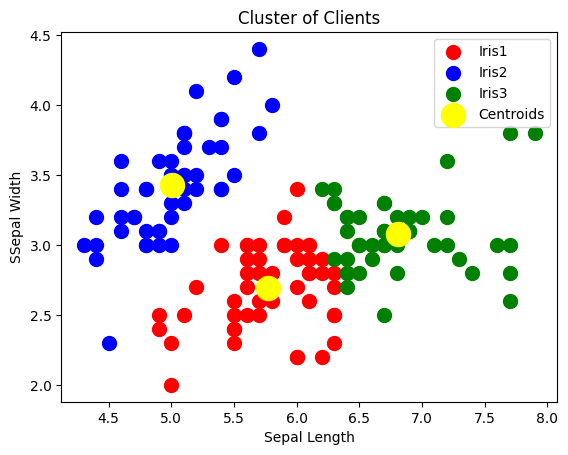

In [44]:
plt.scatter(X[Y_kmeans==0,0],X[Y_kmeans==0,1],s=100,c='red',label='Iris1')
plt.scatter(X[Y_kmeans==1,0],X[Y_kmeans==1,1],s=100,c='blue',label='Iris2')
plt.scatter(X[Y_kmeans==2,0],X[Y_kmeans==2,1],s=100,c='green',label='Iris3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='Yellow',label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('Sepal Length')
plt.ylabel('SSepal Width')
plt.legend()
plt.show()

Gap-Stats-Irisdataset

In [46]:
pip install gap-stat

In [47]:
from sklearn.cluster import KMeans
from gap_statistic import OptimalK
import numpy as np
optimalK = OptimalK(parallel_backend='joblib')
n_clusters = optimalK(X, cluster_array=np.arange(1, 11))
print("Optimal clusters:", n_clusters)

Optimal clusters: 3


In [48]:
kmeans=KMeans(n_clusters=n_clusters,init='k-means++',max_iter=300,n_init=10,random_state=0)
Y_kmeans=kmeans.fit_predict(X)
print(Y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 2 2 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


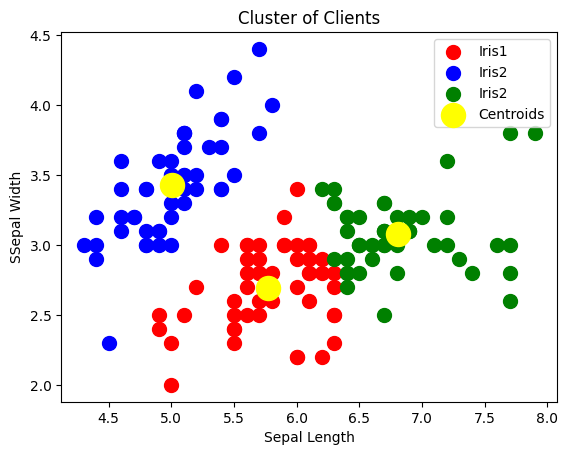

In [49]:
import matplotlib.pyplot as plt
plt.scatter(X[Y_kmeans==0,0],X[Y_kmeans==0,1],s=100,c='red',label='Iris1')
plt.scatter(X[Y_kmeans==1,0],X[Y_kmeans==1,1],s=100,c='blue',label='Iris2')
plt.scatter(X[Y_kmeans==2,0],X[Y_kmeans==2,1],s=100,c='green',label='Iris2')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='Yellow',label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('Sepal Length')
plt.ylabel('SSepal Width')
plt.legend()
plt.show()

SilhouetteScore-Iris Dataset

In [53]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters_range = range(2, 11)
silhouette_scores = []
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
optimal_n_clusters = n_clusters_range[silhouette_scores.index(max(silhouette_scores))]
optimal_n_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

2

In [54]:
kmeans=KMeans(n_clusters=optimal_n_clusters,init='k-means++',max_iter=300,n_init=10,random_state=0)
Y_kmeans=kmeans.fit_predict(X)
print(Y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1
 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0]


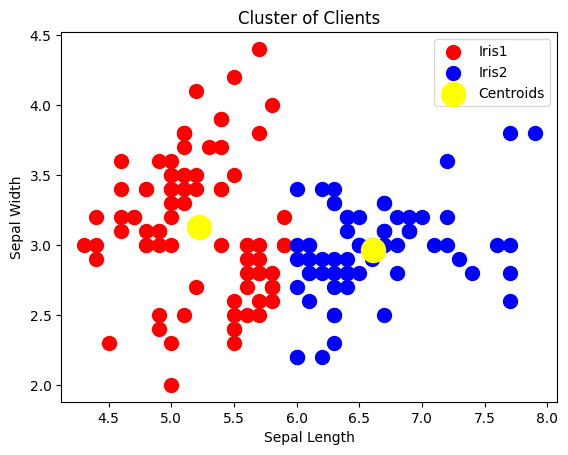

In [55]:
import matplotlib.pyplot as plt
plt.scatter(X[Y_kmeans==0,0],X[Y_kmeans==0,1],s=100,c='red',label='Iris1')
plt.scatter(X[Y_kmeans==1,0],X[Y_kmeans==1,1],s=100,c='blue',label='Iris2')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='Yellow',label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()